In [20]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist

# Morphological Operation on Image

In [10]:
img = cv2.imread(os.path.join('.', 'img', 'morphological_op_img.png'))

In [11]:
kernel = np.ones((5,5), np.uint8)

In [12]:
# Erosion
erosion = cv2.erode(img, kernel, iterations=1)

In [13]:
# Dilation
dilation = cv2.dilate(img, kernel, iterations=1)

In [14]:
# Opening (erosion followed by dilation)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

In [15]:
# Closing (dilation followed by erosion)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

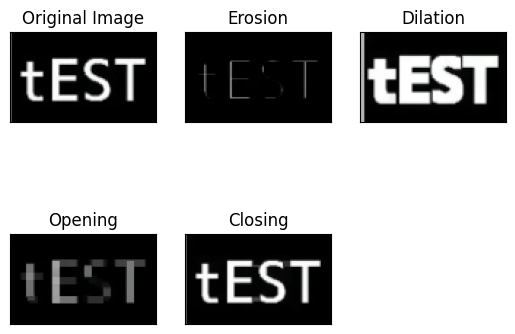

In [16]:
# Display the results
titles = ['Original Image', 'Erosion', 'Dilation', 'Opening', 'Closing']
images = [img, erosion, dilation, opening, closing]

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

# Morphological Operation on Dataset

In [21]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [22]:
# Define a kernel (structuring element)
kernel = np.ones((3,3), np.uint8)  # Suitable for small digits

In [23]:
# Select 5 random images from the dataset (you can modify the indices)
sample_indices = [0, 1, 2, 3, 4]  # Change this to any 5 image indices
selected_images = [train_images[idx] for idx in sample_indices]

In [24]:
# Function to apply morphological operations
def apply_morphology(image, kernel):
    erosion = cv2.erode(image, kernel, iterations=1)
    dilation = cv2.dilate(image, kernel, iterations=1)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    return [image, erosion, dilation, opening, closing]

In [25]:
# Apply operations to all 5 selected images
processed_images = [apply_morphology(img, kernel) for img in selected_images]

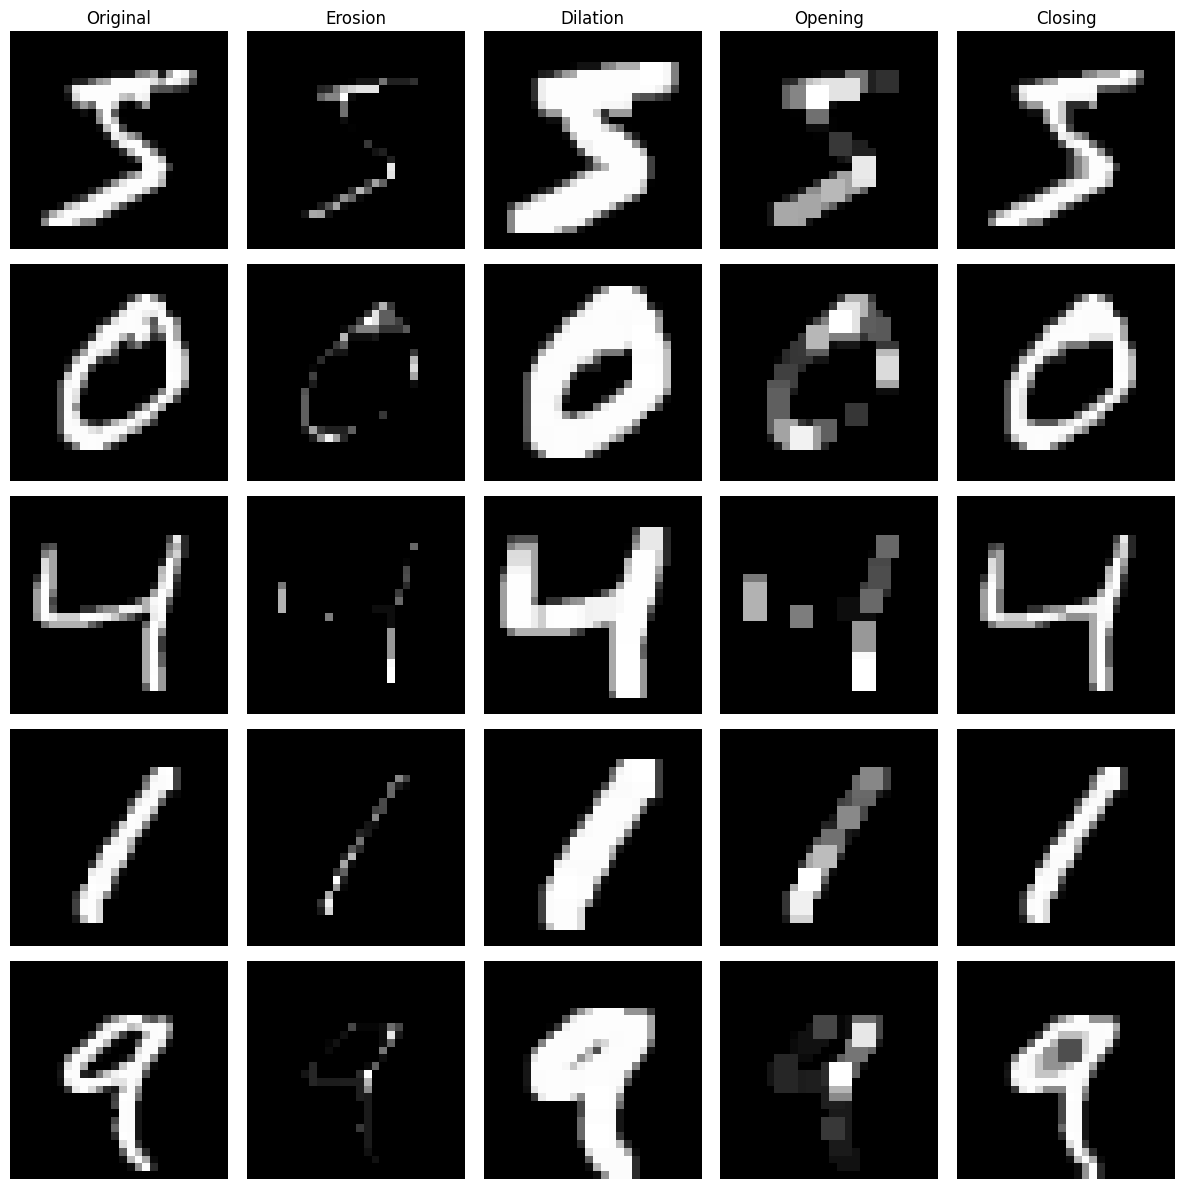

In [26]:
# Titles for visualization
titles = ['Original', 'Erosion', 'Dilation', 'Opening', 'Closing']

# Display results
fig, axes = plt.subplots(5, 5, figsize=(12, 12))

for i in range(5):  # Loop over 5 images
    for j in range(5):  # Loop over 5 operations
        axes[i, j].imshow(processed_images[i][j], cmap='gray')
        if i == 0:
            axes[i, j].set_title(titles[j], fontsize=12)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

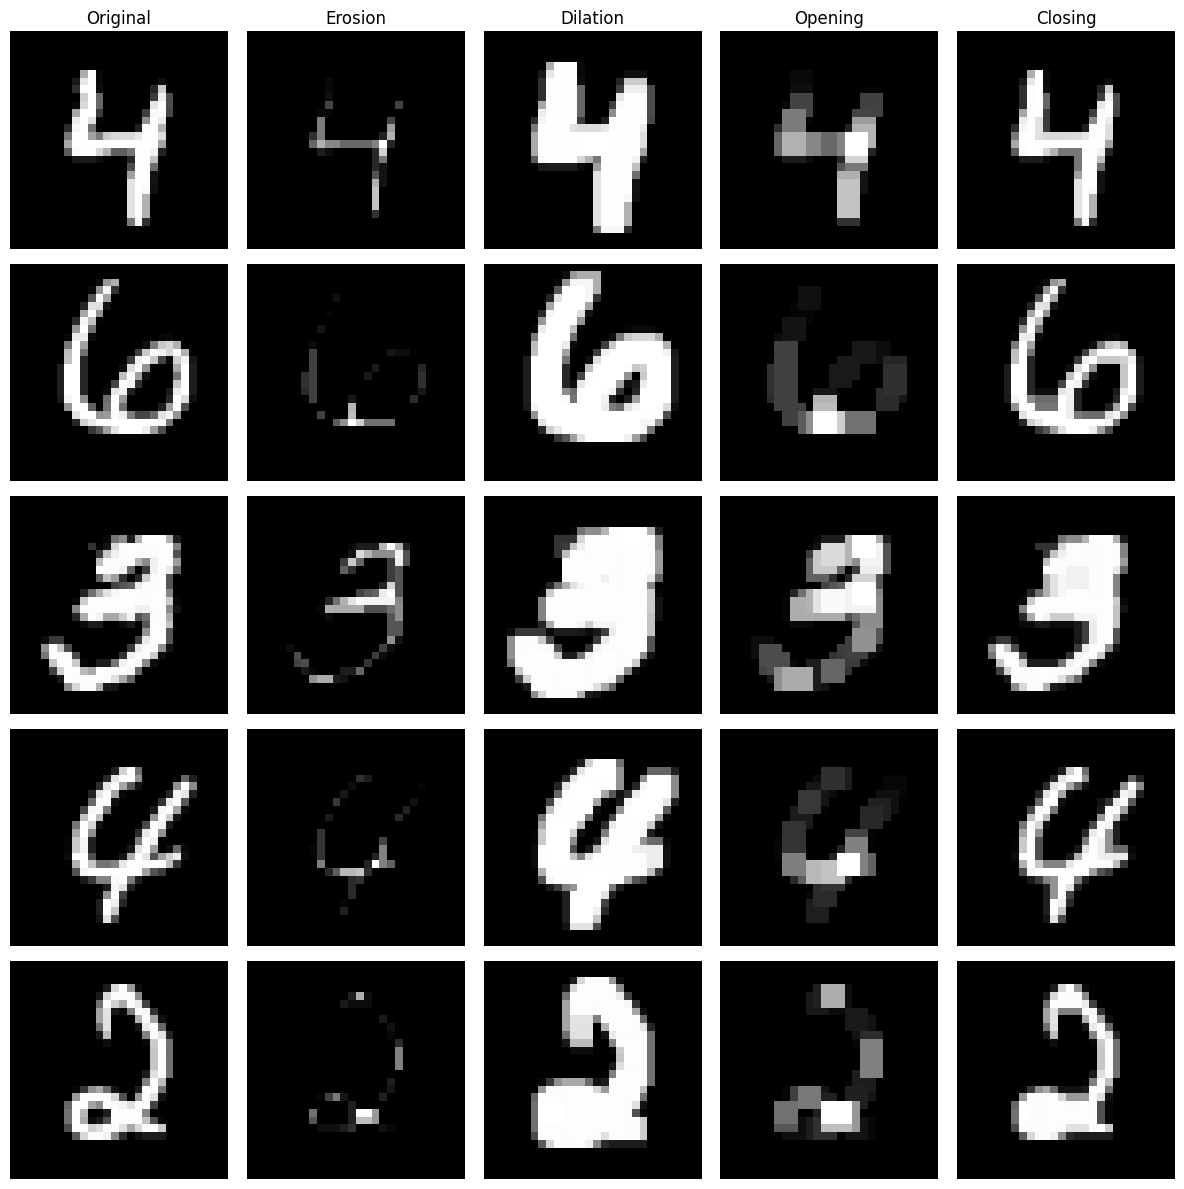

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Define a kernel (structuring element)
kernel = np.ones((3,3), np.uint8)  # Suitable for MNIST small digits

# Function to apply morphological operations to the entire dataset
def apply_morphology(dataset, kernel):
    erosion_set = np.array([cv2.erode(img, kernel, iterations=1) for img in dataset])
    dilation_set = np.array([cv2.dilate(img, kernel, iterations=1) for img in dataset])
    opening_set = np.array([cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel) for img in dataset])
    closing_set = np.array([cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) for img in dataset])
    return erosion_set, dilation_set, opening_set, closing_set

# Apply operations to the entire training and test set
erosion_train, dilation_train, opening_train, closing_train = apply_morphology(train_images, kernel)
erosion_test, dilation_test, opening_test, closing_test = apply_morphology(test_images, kernel)

# Save processed datasets (optional)
np.save('erosion_train.npy', erosion_train)
np.save('dilation_train.npy', dilation_train)
np.save('opening_train.npy', opening_train)
np.save('closing_train.npy', closing_train)

np.save('erosion_test.npy', erosion_test)
np.save('dilation_test.npy', dilation_test)
np.save('opening_test.npy', opening_test)
np.save('closing_test.npy', closing_test)

# Visualize a few random samples (optional)
num_samples = 5  # Number of images to display
random_indices = np.random.choice(len(train_images), num_samples, replace=False)

titles = ['Original', 'Erosion', 'Dilation', 'Opening', 'Closing']

fig, axes = plt.subplots(num_samples, 5, figsize=(12, 12))

for i, idx in enumerate(random_indices):
    images = [train_images[idx], erosion_train[idx], dilation_train[idx], opening_train[idx], closing_train[idx]]
    for j in range(5):
        axes[i, j].imshow(images[j], cmap='gray')
        if i == 0:
            axes[i, j].set_title(titles[j], fontsize=12)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()
